# Stance Detection for the Fake News Challenge

## Identifying Textual Relationships with Deep Neural Nets

### Check the problem context [here](https://drive.google.com/open?id=1KfWaZyQdGBw8AUTacJ2yY86Yxgw2Xwq0).

### Download files required for the project from [here](https://drive.google.com/open?id=10yf39ifEwVihw4xeJJR60oeFBY30Y5J8).

## Step1: Load the given dataset  

1. Mount the google drive

2. Import Glove embeddings

3. Import the test and train datasets

### Mount the google drive to access required project files

Run the below commands

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


#### Path for Project files on google drive

**Note:** You need to change this path according where you have kept the files in google drive. 

In [0]:
project_path = "/content/drive/My Drive/SeqSeqNLP/Fake News Challenge/"

### Loading the Glove Embeddings

In [0]:
import os
os.mkdir(project_path+'glove')

In [0]:
glove_path = project_path + 'glove'

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'glove.6B.zip', 'r') as z:
  z.extractall(glove_path)

# Load the dataset [5 Marks]

1. Using [read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) in pandas load the given train datasets files **`train_bodies.csv`** and **`train_stances.csv`**

2. Using [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) command in pandas merge the two datasets based on the Body ID. 

Note: Save the final merged dataset in a dataframe with name **`dataset`**.

In [0]:
import pandas as pd

In [0]:
train_bodies = pd.read_csv('/content/drive/My Drive/SeqSeqNLP/Fake News Challenge/train_bodies.csv')
train_stances = pd.read_csv('/content/drive/My Drive/SeqSeqNLP/Fake News Challenge/train_stances.csv')

In [0]:
test_bodies = pd.read_csv('/content/drive/My Drive/SeqSeqNLP/Fake News Challenge/test_bodies.csv')

In [7]:
train_stances['Stance'].value_counts()

unrelated    36545
discuss       8909
agree         3678
disagree       840
Name: Stance, dtype: int64

In [8]:
train_bodies.count()

Body ID        1683
articleBody    1683
dtype: int64

In [9]:
train_stances.count()

Headline    49972
Body ID     49972
Stance      49972
dtype: int64

In [10]:
train_stances['Body ID'].value_counts()

1921    187
1948    175
40      172
524     171
1549    166
304     154
1385    151
125     145
2367    143
220     141
1438    141
195     140
2296    136
35      131
1786    131
1883    131
2520    127
1034    127
2252    126
1574    125
2307    125
527     125
2175    124
1627    123
2404    123
1289    122
2115    121
2096    120
1040    118
1893    117
       ... 
907       1
370       1
210       1
146       1
114       1
1542      1
63        1
76        1
390       1
515       1
193       1
464       1
355       1
323       1
624       1
282       1
18        1
797       1
701       1
362       1
2311      1
6         1
915       1
70        1
151       1
376       1
140       1
307       1
1066      1
59        1
Name: Body ID, Length: 1683, dtype: int64

In [11]:
train_stances[train_stances['Body ID']==0].count()

Headline    36
Body ID     36
Stance      36
dtype: int64

In [12]:
train_bodies.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [13]:
train_stances.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


In [0]:
dataset = pd.merge(train_stances,train_bodies,how='left',left_on='Body ID', right_on='Body ID')

In [15]:
dataset.head()

,Headline,Body ID,Stance,articleBody
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\n\n...
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated,30-year-old Moscow resident was hospitalized w...
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...
4,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's..."


In [16]:
dataset['Stance'].value_counts()

unrelated    36545
discuss       8909
agree         3678
disagree       840
Name: Stance, dtype: int64

In [17]:
dataset.count()

Headline       49972
Body ID        49972
Stance         49972
articleBody    49972
dtype: int64

In [18]:
dataset[dataset['Body ID']==0].count()

Headline       36
Body ID        36
Stance         36
articleBody    36
dtype: int64


<h2> Check1:</h2>
  
<h3> You should see the below output if you run `dataset.head()` command as given below </h3>

In [19]:
dataset.head()

,Headline,Body ID,Stance,articleBody
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\n\n...
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated,30-year-old Moscow resident was hospitalized w...
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...
4,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's..."


## Step2: Data Pre-processing and setting some hyper parameters needed for model


#### Run the code given below to set the required parameters.

1. `MAX_SENTS` = Maximum no.of sentences to consider in an article.

2. `MAX_SENT_LENGTH` = Maximum no.of words to consider in a sentence.

3. `MAX_NB_WORDS` = Maximum no.of words in the total vocabualry.

4. `MAX_SENTS_HEADING` = Maximum no.of sentences to consider in a heading of an article.

In [0]:
MAX_NB_WORDS = 20000
MAX_SENTS = 20
MAX_SENTS_HEADING = 1
MAX_SENT_LENGTH = 20
VALIDATION_SPLIT = 0.2

### Download the `Punkt` from nltk using the commands given below. This is for sentence tokenization.

For more info on how to use it, read [this](https://stackoverflow.com/questions/35275001/use-of-punktsentencetokenizer-in-nltk).



In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Tokenizing the text and loading the pre-trained Glove word embeddings for each token  [5 marks] 

Keras provides [Tokenizer API](https://keras.io/preprocessing/text/) for preparing text. Read it before going any further.

#### Import the Tokenizer from keras preprocessing text

In [22]:
import keras
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import PunktSentenceTokenizer,sent_tokenize

Using TensorFlow backend.


#### Initialize the Tokenizer class with maximum vocabulary count as `MAX_NB_WORDS` initialized at the start of step2. 

In [0]:
token = Tokenizer(num_words=MAX_NB_WORDS)


#### Now, using fit_on_texts() from Tokenizer class, lets encode the data 

Note: We need to fit articleBody and Headline also to cover all the words.

In [0]:
token.fit_on_texts(dataset['articleBody'])
token.fit_on_texts(dataset['Headline'])

#### fit_on_texts() gives the following attributes in the output as given [here](https://faroit.github.io/keras-docs/1.2.2/preprocessing/text/).

* **word_counts:** dictionary mapping words (str) to the number of times they appeared on during fit. Only set after fit_on_texts was called.

* **word_docs:** dictionary mapping words (str) to the number of documents/texts they appeared on during fit. Only set after fit_on_texts was called.

* **word_index:** dictionary mapping words (str) to their rank/index (int). Only set after fit_on_texts was called.

* **document_count:** int. Number of documents (texts/sequences) the tokenizer was trained on. Only set after fit_on_texts or fit_on_sequences was called.



In [25]:
token.word_counts

OrderedDict([('danny', 1326),
             ('boyle', 1402),
             ('is', 188664),
             ('directing', 388),
             ('the', 1129192),
             ('untitled', 307),
             ('film', 5197),
             ('seth', 1357),
             ('rogen', 1921),
             ('being', 24418),
             ('eyed', 190),
             ('to', 499727),
             ('play', 4557),
             ('apple', 39336),
             ('co', 4877),
             ('founder', 2576),
             ('steve', 6470),
             ('wozniak', 1518),
             ('in', 408093),
             ('sony’s', 164),
             ('jobs', 7660),
             ('biopic', 2243),
             ('based', 7769),
             ('on', 179649),
             ('walter', 1000),
             ("isaacson's", 595),
             ('book', 2782),
             ('and', 383593),
             ('adapted', 83),
             ('by', 104742),
             ('aaron', 1550),
             ('sorkin', 2714),
             ('which', 40671),
     

In [26]:
token.word_docs

defaultdict(int,
            {'later': 8036,
             'walter': 929,
             'for': 45015,
             'actor': 2240,
             'dealmaking': 39,
             'sources': 5918,
             'of': 55625,
             'founder': 2114,
             'which': 23501,
             'first': 15463,
             'have': 38399,
             'one': 24379,
             'anticipated': 770,
             'if': 18146,
             'in': 60082,
             'wayne': 196,
             'list': 1554,
             'wozniak': 1099,
             'offer': 1907,
             'talks': 2397,
             'negotiations': 1570,
             'apple': 7317,
             'atari': 39,
             'film': 2548,
             'boyle': 1112,
             'casady': 253,
             'being': 17371,
             'untitled': 268,
             '—': 9766,
             'still': 9834,
             'angeles': 570,
             'eyed': 190,
             'and': 50182,
             'jessica': 395,
             'bale': 23

In [27]:
token.word_index

{'the': 1,
 'to': 2,
 'a': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'that': 7,
 'is': 8,
 'was': 9,
 'on': 10,
 'for': 11,
 'said': 12,
 'he': 13,
 'with': 14,
 'it': 15,
 'his': 16,
 'have': 17,
 'as': 18,
 'by': 19,
 'has': 20,
 'at': 21,
 'from': 22,
 'be': 23,
 'an': 24,
 'not': 25,
 'are': 26,
 'been': 27,
 '”': 28,
 'but': 29,
 'who': 30,
 'this': 31,
 'had': 32,
 'they': 33,
 'after': 34,
 'i': 35,
 'were': 36,
 'we': 37,
 'will': 38,
 'about': 39,
 'one': 40,
 'or': 41,
 'isis': 42,
 'video': 43,
 'which': 44,
 'she': 45,
 'apple': 46,
 'state': 47,
 'up': 48,
 'her': 49,
 'would': 50,
 'their': 51,
 'more': 52,
 'also': 53,
 'when': 54,
 'told': 55,
 'new': 56,
 'out': 57,
 'no': 58,
 'all': 59,
 'people': 60,
 'there': 61,
 'you': 62,
 'its': 63,
 'if': 64,
 'him': 65,
 'islamic': 66,
 'news': 67,
 'man': 68,
 'could': 69,
 'what': 70,
 'year': 71,
 'watch': 72,
 'time': 73,
 'al': 74,
 'over': 75,
 'some': 76,
 'group': 77,
 'according': 78,
 'u': 79,
 's': 80,
 'into': 81,
 'firs

In [28]:
token.document_count

99944

### Now, tokenize the sentences using nltk sent_tokenize() and encode the senteces with the ids we got form the above `t.word_index`

Initialise 2 lists with names `texts` and `articles`.

```
texts = [] to store text of article as it is.

articles = [] split the above text into a list of sentences.
```

In [0]:
texts=[]
articles=[]

In [30]:
sent_tokenize(dataset['articleBody'][0])

['Danny Boyle is directing the untitled film\n\nSeth Rogen is being eyed to play Apple co-founder Steve Wozniak in Sony’s Steve Jobs biopic.',
 "Danny Boyle is directing the untitled film, based on Walter Isaacson's book and adapted by Aaron Sorkin, which is one of the most anticipated biopics in recent years.",
 'Negotiations have not yet begun, and it’s not even clear if Rogen has an official offer, but the producers — Scott Rudin, Guymon Casady and Mark Gordon — have set their sights on the talent and are in talks.',
 'Of course, this may all be for naught as Christian Bale, the actor who is to play Jobs, is still in the midst of closing his deal.',
 'Sources say that dealmaking process is in a sensitive stage.',
 'Insiders say Boyle will is flying to Los Angeles to meet with actress to play one of the female leads, an assistant to Jobs.',
 'Insiders say that Jessica Chastain is one of the actresses on the meeting list.',
 'Wozniak, known as "Woz," co-founded Apple with Jobs and Ron

In [0]:
for article in dataset['articleBody']:
  texts.append(article)
  articles.append(sent_tokenize(article))

## Check 2:

first element of texts and articles should be as given below. 

In [32]:
texts[0]

'Danny Boyle is directing the untitled film\n\nSeth Rogen is being eyed to play Apple co-founder Steve Wozniak in Sony’s Steve Jobs biopic.\n\nDanny Boyle is directing the untitled film, based on Walter Isaacson\'s book and adapted by Aaron Sorkin, which is one of the most anticipated biopics in recent years.\n\nNegotiations have not yet begun, and it’s not even clear if Rogen has an official offer, but the producers — Scott Rudin, Guymon Casady and Mark Gordon — have set their sights on the talent and are in talks.\n\nOf course, this may all be for naught as Christian Bale, the actor who is to play Jobs, is still in the midst of closing his deal. Sources say that dealmaking process is in a sensitive stage.\n\nInsiders say Boyle will is flying to Los Angeles to meet with actress to play one of the female leads, an assistant to Jobs. Insiders say that Jessica Chastain is one of the actresses on the meeting list.\n\nWozniak, known as "Woz," co-founded Apple with Jobs and Ronald Wayne. He

In [33]:
articles[0]

['Danny Boyle is directing the untitled film\n\nSeth Rogen is being eyed to play Apple co-founder Steve Wozniak in Sony’s Steve Jobs biopic.',
 "Danny Boyle is directing the untitled film, based on Walter Isaacson's book and adapted by Aaron Sorkin, which is one of the most anticipated biopics in recent years.",
 'Negotiations have not yet begun, and it’s not even clear if Rogen has an official offer, but the producers — Scott Rudin, Guymon Casady and Mark Gordon — have set their sights on the talent and are in talks.',
 'Of course, this may all be for naught as Christian Bale, the actor who is to play Jobs, is still in the midst of closing his deal.',
 'Sources say that dealmaking process is in a sensitive stage.',
 'Insiders say Boyle will is flying to Los Angeles to meet with actress to play one of the female leads, an assistant to Jobs.',
 'Insiders say that Jessica Chastain is one of the actresses on the meeting list.',
 'Wozniak, known as "Woz," co-founded Apple with Jobs and Ron

In [34]:
len(texts)

49972

In [35]:
len(articles)

49972

# Now iterate through each article and each sentence to encode the words into ids using t.word_index  [5 marks] 

Here, to get words from sentence you can use `text_to_word_sequence` from keras preprocessing text.

1. Import text_to_word_sequence

2. Initialize a variable of shape (no.of articles, MAX_SENTS, MAX_SENT_LENGTH) with name `data` with zeros first (you can use numpy [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) to initialize with all zeros)and then update it while iterating through the words and sentences in each article.

In [0]:
from keras.preprocessing.text import text_to_word_sequence

In [0]:
import numpy as np
data = np.zeros((len(articles),MAX_SENTS,MAX_SENT_LENGTH))

In [0]:
articleCount=0
for article in articles:
  #if(articleCount < 5):
    sentenceCount=0  
    for sentence in article:
      wordCount=0
      #print('sentenceCount is ',sentenceCount)
      if(sentenceCount < MAX_SENTS):
        for word in text_to_word_sequence(sentence):
          #print('wordCount is ',wordCount)
          if(wordCount < MAX_SENT_LENGTH):
            #print(word,' - ',token.word_index.get(word))
            data[articleCount][sentenceCount][wordCount]=token.word_index.get(word)
            wordCount = wordCount + 1
      sentenceCount = sentenceCount + 1
    articleCount = articleCount + 1
    

In [60]:
token.word_index.get('of')

4

In [66]:
data.shape

(49972, 20, 20)

In [74]:
articles[49971]

['A married TV actor who met a young woman and kissed her in a sauna woke up to find his testicles had been stolen.',
 'Dmitry Nikolaev, 30, is believed to be the target of a gang – including a doctor – which may be harvesting organs to sell on the black market.',
 'Nikolaev had a drink with a young blonde woman he met at a bar in a Moscow theatre before she invited him to a sauna, reports MailOnline.',
 'A police source told the website: ‘They kissed and had some more beer and after that the actor remembers nothing.’ They believe Nikolaev’s drink was spiked.',
 'He woke up the next day at a bus stop in acute pain and noticed blood on his trousers.',
 'At the hospital staff told him that his testicles had been removed and that it appeared the operation had been done by a medical professional.',
 'Police believe the gang is stealing human organs to sell on the black market.',
 'MORE: PC who ‘suffered bruised testicles’ cleared of attacking mum in hospital where her sick daughter was sta

In [102]:
data[49971,:,:]

array([[3.0000e+00, 9.7600e+02, 3.7900e+02, 6.5300e+02, 3.0000e+01,
        8.5200e+02, 3.0000e+00, 4.1800e+02, 1.9200e+02, 6.0000e+00,
        6.9180e+03, 4.9000e+01, 5.0000e+00, 3.0000e+00, 4.8420e+03,
        1.6680e+03, 4.8000e+01, 2.0000e+00, 4.0700e+02, 1.6000e+01],
       [8.3360e+03, 5.4930e+03, 7.5000e+02, 8.0000e+00, 2.2900e+02,
        2.0000e+00, 2.3000e+01, 1.0000e+00, 1.7980e+03, 4.0000e+00,
        3.0000e+00, 7.9800e+02, 1.9600e+02, 1.5700e+02, 3.0000e+00,
        3.3260e+03, 1.9600e+02, 4.4000e+01, 1.1100e+02, 2.3000e+01],
       [5.4930e+03, 3.2000e+01, 3.0000e+00, 2.7790e+03, 1.4000e+01,
        3.0000e+00, 4.1800e+02, 6.1610e+03, 1.9200e+02, 1.3000e+01,
        8.5200e+02, 2.1000e+01, 3.0000e+00, 4.0810e+03, 5.0000e+00,
        3.0000e+00, 4.3050e+03, 9.6090e+03, 1.0300e+02, 4.5000e+01],
       [3.0000e+00, 9.0000e+01, 2.1500e+02, 5.5000e+01, 1.0000e+00,
        3.4400e+02, 1.0403e+04, 6.9180e+03, 6.0000e+00, 3.2000e+01,
        7.6000e+01, 5.2000e+01, 5.6020e+03, 6

### Check 3:

Accessing first element in data should give something like given below.

In [103]:
data[0, :, :]

array([[1.9100e+03, 1.8370e+03, 8.0000e+00, 4.7800e+03, 1.0000e+00,
        5.6010e+03, 4.9000e+02, 1.8720e+03, 1.3690e+03, 8.0000e+00,
        8.4000e+01, 7.6180e+03, 2.0000e+00, 5.5700e+02, 4.6000e+01,
        5.2400e+02, 1.0210e+03, 3.8200e+02, 1.6770e+03, 5.0000e+00],
       [1.9100e+03, 1.8370e+03, 8.0000e+00, 4.7800e+03, 1.0000e+00,
        5.6010e+03, 4.9000e+02, 3.0300e+02, 1.0000e+01, 2.3600e+03,
        3.5540e+03, 9.3700e+02, 6.0000e+00, 1.2389e+04, 1.9000e+01,
        1.6430e+03, 9.6900e+02, 4.4000e+01, 8.0000e+00, 4.0000e+01],
       [1.2000e+03, 1.7000e+01, 2.5000e+01, 3.2600e+02, 3.1230e+03,
        6.0000e+00, 1.9700e+02, 2.5000e+01, 1.1900e+02, 5.4300e+02,
        6.4000e+01, 1.3690e+03, 2.0000e+01, 2.4000e+01, 1.5000e+02,
        1.0050e+03, 2.9000e+01, 1.0000e+00, 3.3870e+03, 9.1000e+01],
       [4.0000e+00, 9.9000e+02, 3.1000e+01, 1.1100e+02, 5.9000e+01,
        2.3000e+01, 1.1000e+01, 1.7470e+04, 1.8000e+01, 6.3900e+02,
        4.6400e+02, 1.0000e+00, 6.5300e+02, 3

# Repeat the same process for the `Headings` as well. Use variables with names `texts_heading` and `articles_heading` accordingly. [5 marks] 

In [0]:
texts_heading = []
articles_heading = []

In [0]:
for headline in dataset['Headline']:
  texts_heading.append(headline)
  articles_heading.append(sent_tokenize(headline))

In [82]:
len(texts_heading)

49972

In [83]:
len(articles_heading)

49972

In [85]:
texts_heading[0]

"Police find mass graves with at least '15 bodies' near Mexico town where 43 students disappeared after police clash"

In [86]:
articles_heading[0]

["Police find mass graves with at least '15 bodies' near Mexico town where 43 students disappeared after police clash"]

In [0]:
import numpy as np
data_heading = np.zeros((len(articles_heading),MAX_SENTS_HEADING,MAX_SENT_LENGTH))

In [0]:
articleHeadingCount=0
for articleHeading in articles_heading:
    sentenceHeadingCount=0  
    for sentenceHeading in articleHeading:
      wordHeadingCount=0
      #print('sentenceCount is ',sentenceCount)
      if(sentenceHeadingCount < MAX_SENTS_HEADING):
        for wordHeading in text_to_word_sequence(sentenceHeading):
          #print('wordCount is ',wordCount)
          if(wordHeadingCount < MAX_SENT_LENGTH):
            #print(word,' - ',token.word_index.get(word))
            data_heading[articleHeadingCount][sentenceHeadingCount][wordHeadingCount]=token.word_index.get(wordHeading)
            wordHeadingCount = wordHeadingCount + 1
      sentenceHeadingCount = sentenceHeadingCount + 1
    articleHeadingCount = articleHeadingCount + 1

In [99]:
data_heading[0,:,:]

array([[9.0000e+01, 4.0700e+02, 7.1200e+02, 1.4350e+03, 1.4000e+01,
        2.1000e+01, 2.1400e+02, 1.9696e+04, 1.9697e+04, 1.5900e+02,
        7.3500e+02, 2.3600e+02, 1.1500e+02, 1.9070e+03, 3.7500e+02,
        1.7580e+03, 3.4000e+01, 9.0000e+01, 5.7840e+03, 0.0000e+00]])

### Now the features are ready, lets make the labels ready for the model to process.

### Convert labels into one-hot vectors

You can use [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) in pandas to create one-hot vectors.

In [88]:
dataset['Stance'].value_counts()

unrelated    36545
discuss       8909
agree         3678
disagree       840
Name: Stance, dtype: int64

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Stance_label'] = le.fit_transform(dataset['Stance'])
dataset['Stance_label'].value_counts()

3    36545
2     8909
0     3678
1      840
Name: Stance_label, dtype: int64

In [0]:
labels = keras.utils.to_categorical(dataset['Stance_label'])

### Check 4:

The shape of data and labels shoould match the given below numbers.

In [104]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (49972, 20, 20)
Shape of label tensor: (49972, 4)


### Shuffle the data

In [0]:
## get numbers upto no.of articles
indices = np.arange(data.shape[0])
## shuffle the numbers
np.random.shuffle(indices)

In [0]:
## shuffle the data
data = data[indices]
data_heading = data_heading[indices]
## shuffle the labels according to data
labels = labels[indices]

### Split into train and validation sets. Split the train set 80:20 ratio to get the train and validation sets.


Use the variable names as given below:

x_train, x_val - for body of articles.

x-heading_train, x_heading_val - for heading of articles.

y_train - for training labels.

y_val - for validation labels.



In [0]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(data,labels,test_size=0.2, random_state=2019)
x_heading_train,x_heading_val,y_train,y_val = train_test_split(data_heading,labels,test_size=0.2, random_state=2019)

In [113]:
x_train.shape

(39977, 20, 20)

In [114]:
y_train.shape

(39977, 4)

In [115]:
x_val.shape

(9995, 20, 20)

In [116]:
y_val.shape

(9995, 4)

In [118]:
x_heading_train.shape

(39977, 1, 20)

In [119]:
x_heading_val.shape

(9995, 1, 20)

### Check 5:

The shape of x_train, x_val, y_train and y_val should match the below numbers.

In [0]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(39978, 20, 20)
(39978, 4)
(9994, 20, 20)
(9994, 4)


In [120]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(39977, 20, 20)
(39977, 4)
(9995, 20, 20)
(9995, 4)


### Create embedding matrix with the glove embeddings


Run the below code to create embedding_matrix which has all the words and their glove embedding if present in glove word list.

In [124]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/My Drive/SeqSeqNLP/Fake News Challenge/glove/glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

vocab_size = len(token.word_index)+1

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))


for word, i in token.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


# Try the sequential model approach and report the accuracy score. [10 marks]  

### Import layers from Keras to build the model

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

### Model

In [0]:
# define model
model = Sequential()
input_shape = x_train[0].shape
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_shape=input_shape, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

In [0]:
# define model
model_heading = Sequential()
input_shape = x_heading_train[0].shape
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_shape=input_shape, trainable=False)
model_heading.add(e)
model_heading.add(Flatten())
model_heading.add(Dense(4, activation='softmax'))

### Compile and fit the model

In [166]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 20, 20, 100)       2787400   
_________________________________________________________________
flatten_6 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 160004    
Total params: 2,947,404
Trainable params: 160,004
Non-trainable params: 2,787,400
_________________________________________________________________
None


In [173]:
# compile the model
model_heading.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# summarize the model
print(model_heading.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 1, 20, 100)        2787400   
_________________________________________________________________
flatten_8 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 8004      
Total params: 2,795,404
Trainable params: 8,004
Non-trainable params: 2,787,400
_________________________________________________________________
None


In [0]:
saveModelPath = '/content/drive/My Drive/SeqSeqNLP/Model/'

In [149]:
import os
os.mkdir(saveModelPath)

FileExistsError: ignored

In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc = ModelCheckpoint(monitor='val_acc',save_weights_only=True,save_best_only=True,mode='auto',verbose=1,filepath=saveModelPath+'best_weights_seqNlp.h5')
es = EarlyStopping(patience=5,verbose=1,mode='auto',monitor='val_acc')

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Train on 39977 samples, validate on 9995 samples
Epoch 1/50
39977/39977 [==============================] - 4s 104us/step - loss: 1.7906 - acc: 0.7319 - val_loss: 1.9462 - val_acc: 0.7655

Epoch 00001: val_acc improved from -inf to 0.76548, saving model to /content/drive/My Drive/SeqSeqNLP/Model/best_weights_seqNlp.h5
Epoch 2/50
39977/39977 [==============================] - 4s 102us/step - loss: 1.9893 - acc: 0.7629 - val_loss: 2.2101 - val_acc: 0.7364

Epoch 00002: val_acc did not improve from 0.76548
Epoch 3/50
39977/39977 [==============================] - 4s 102us/step - loss: 2.0980 - acc: 0.7689 - val_loss: 2.2037 - val_acc: 0.7366

Epoch 00003: val_acc did not improve from 0.76548
Epoch 4/50
39977/39977 [==============================] - 4s 101us/step - loss: 2.1778 - acc: 0.7758 - val_loss: 2.3090 - val_acc: 0.7759

Epoch 00004: val_acc improved from 0.76548 to 0.77589, saving model to /content/drive/My Drive/SeqSeqNLP/Model/best_weights_seqNlp.h5
Epoch 5/50
39977/39977 [======

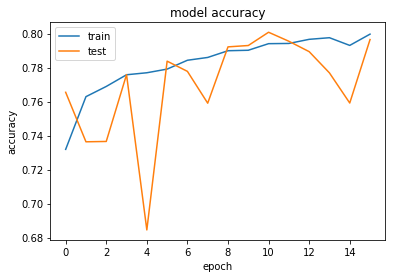

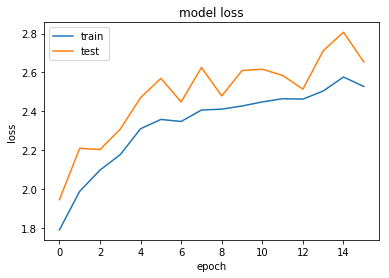

In [170]:
# fit the model
nlp_his = model.fit(x_train, y_train, validation_data=(x_val,y_val), callbacks=[mc,es], epochs=50, verbose=1)


# list all data in history
print(nlp_his.history.keys())
# summarize history for accuracy
plt.plot(nlp_his.history['acc'])
plt.plot(nlp_his.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(nlp_his.history['loss'])
plt.plot(nlp_his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc_hdg = ModelCheckpoint(monitor='val_acc',save_weights_only=True,save_best_only=True,mode='auto',verbose=1,filepath=saveModelPath+'best_weights_seqNlp_hdg.h5')
es_hdg = EarlyStopping(patience=5,verbose=1,mode='auto',monitor='val_acc')

Train on 39977 samples, validate on 9995 samples
Epoch 1/50
39977/39977 [==============================] - 4s 91us/step - loss: 0.6945 - acc: 0.7200 - val_loss: 0.7735 - val_acc: 0.7231

Epoch 00001: val_acc improved from -inf to 0.72306, saving model to /content/drive/My Drive/SeqSeqNLP/Model/best_weights_seqNlp_hdg.h5
Epoch 2/50
39977/39977 [==============================] - 4s 93us/step - loss: 0.6923 - acc: 0.7191 - val_loss: 0.7517 - val_acc: 0.7160

Epoch 00002: val_acc did not improve from 0.72306
Epoch 3/50
39977/39977 [==============================] - 4s 93us/step - loss: 0.6916 - acc: 0.7194 - val_loss: 0.7487 - val_acc: 0.7231

Epoch 00003: val_acc did not improve from 0.72306
Epoch 4/50
39977/39977 [==============================] - 4s 94us/step - loss: 0.6920 - acc: 0.7179 - val_loss: 0.7444 - val_acc: 0.7184

Epoch 00004: val_acc did not improve from 0.72306
Epoch 5/50
39977/39977 [==============================] - 4s 93us/step - loss: 0.6906 - acc: 0.7183 - val_loss: 0.

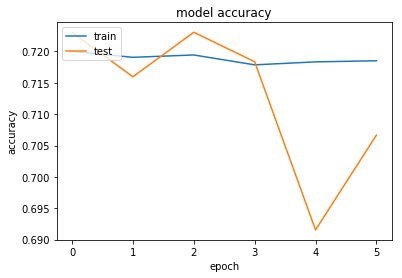

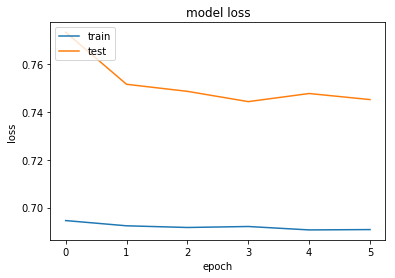

In [177]:
# fit the model
nlp_hdg_his = model_heading.fit(x_heading_train, y_train, validation_data=(x_heading_val,y_val), callbacks=[mc_hdg,es_hdg], epochs=50, verbose=1)


# list all data in history
print(nlp_hdg_his.history.keys())
# summarize history for accuracy
plt.plot(nlp_hdg_his.history['acc'])
plt.plot(nlp_hdg_his.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(nlp_hdg_his.history['loss'])
plt.plot(nlp_hdg_his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [178]:
# evaluate the model
loss, accuracy = model.evaluate(x_val, y_val, verbose=1)
print('Accuracy: %f' % (accuracy*100))

9995/9995 [==============================] - 0s 46us/step
Accuracy: 79.649825


In [180]:
# evaluate the model
loss, accuracy = model_heading.evaluate(x_heading_val, y_val, verbose=1)
print('Accuracy for validation data: %f' % (accuracy*100))

9995/9995 [==============================] - 0s 37us/step
Accuracy for validation data: 70.665333


In [160]:
test_bodies.head()

,Body ID,articleBody
0,1,Al-Sisi has denied Israeli reports stating tha...
1,2,A bereaved Afghan mother took revenge on the T...
2,3,CNBC is reporting Tesla has chosen Nevada as t...
3,12,A 4-inch version of the iPhone 6 is said to be...
4,19,GR editor’s Note\n\nThere are no reports in th...


## Build the same model with attention layers included for better performance (Optional)

## Fit the model and report the accuracy score for the model with attention layer (Optional)